In [2]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=8ef943d884e66c94a69476f4eea8260b81757c58de6ae77b439bec2838f714e3
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


## **DATA COLLECTION**

***In this phase we will collect the customer ratings data from the airline quality website called Skytrax. We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.***

In [4]:
#import necessaries libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [5]:
#create an empty list to collect all the reviews
reviews = []

#create an empty list to collect all the rating stars
stars = []

#create an empty list to collect the date
date = []

#create an empty list to collect country the reviewer is from
country = []


In [30]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [32]:
#check the length of reviews
len(reviews)

1000

In [33]:
#create dataframe from all these collected list of data

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Second time BA Premium Econ...
1,Not Verified | They changed our Flights from ...
2,Not Verified | At Copenhagen the most chaotic...
3,✅ Trip Verified | Worst experience of my life...
4,✅ Trip Verified | Due to code sharing with Ca...


In [34]:
df.shape

(1000, 1)

### **Export the data into CSV format**

In [35]:
import os
cwd = os.getcwd()
df.to_csv(cwd+'/BA_reviews.csv')

## **DATA CLEANING**

SINCE WE'VE EXTRACTED THE DATA FROM THE WEBSITE, IT IS NOT CLEANED AND READY TO BE ANALYSED, THE REVIEW SECTION WILL NEED TO BE CLEANED FOR PUNCTUATIONS , SPELLING AND COLUMNS

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [48]:
#create dataframe from csv file
cwd = os.getcwd()
df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)
df.head()

,reviews
0,✅ Trip Verified | Second time BA Premium Econ...
1,Not Verified | They changed our Flights from ...
2,Not Verified | At Copenhagen the most chaotic...
3,✅ Trip Verified | Worst experience of my life...
4,✅ Trip Verified | Due to code sharing with Ca...


In [49]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0       True
1      False
2      False
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

##**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

## **Data preprocessing steps:**

1 Cleaning the text

2 Tokenization

3 Enrichment – POS tagging

4 Stopwords removal

5 Obtaining the stem words

## STEP 1 CLEANING THE DATA

In [50]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,verified,Cleaned Reviews
0,✅ Trip Verified | Second time BA Premium Econ...,True,Trip Verified Second time BA Premium Economy ...
1,Not Verified | They changed our Flights from ...,False,Not Verified They changed our Flights from Bru...
2,Not Verified | At Copenhagen the most chaotic...,False,Not Verified At Copenhagen the most chaotic ti...
3,✅ Trip Verified | Worst experience of my life...,True,Trip Verified Worst experience of my life try...
4,✅ Trip Verified | Due to code sharing with Ca...,True,Trip Verified Due to code sharing with Cathay...


In [51]:
#CHECKING THE NULL VALUES
df.isnull().value_counts()

reviews  verified  Cleaned Reviews
False    False     False              1000
dtype: int64

In [52]:
df.reviews.isnull().value_counts()

False    1000
Name: reviews, dtype: int64

In [53]:
#resetting the index
df.reset_index(drop=True)

,reviews,verified,Cleaned Reviews
0,✅ Trip Verified | Second time BA Premium Econ...,True,Trip Verified Second time BA Premium Economy ...
1,Not Verified | They changed our Flights from ...,False,Not Verified They changed our Flights from Bru...
2,Not Verified | At Copenhagen the most chaotic...,False,Not Verified At Copenhagen the most chaotic ti...
3,✅ Trip Verified | Worst experience of my life...,True,Trip Verified Worst experience of my life try...
4,✅ Trip Verified | Due to code sharing with Ca...,True,Trip Verified Due to code sharing with Cathay...
...,...,...,...
995,✅ Trip Verified | BA First Class is not even ...,True,Trip Verified BA First Class is not even that...
996,✅ Trip Verified | Linate to London. The morni...,True,Trip Verified Linate to London The morning of...
997,✅ Trip Verified | Flew British Airways from JK...,True,Trip Verified Flew British Airways from JK to...
998,✅ Trip Verified | I have flown British Airways...,True,Trip Verified I have flown British Airways nu...


## **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## **Step 3: Enrichment – POS tagging**
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## **Step 4: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

## Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [54]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,verified,Cleaned Reviews,POS tagged
0,✅ Trip Verified | Second time BA Premium Econ...,True,Trip Verified Second time BA Premium Economy ...,"[(Trip, n), (Verified, n), (Second, n), (time,..."
1,Not Verified | They changed our Flights from ...,False,Not Verified They changed our Flights from Bru...,"[(Verified, n), (changed, v), (Flights, n), (B..."
2,Not Verified | At Copenhagen the most chaotic...,False,Not Verified At Copenhagen the most chaotic ti...,"[(Verified, v), (Copenhagen, n), (chaotic, a),..."
3,✅ Trip Verified | Worst experience of my life...,True,Trip Verified Worst experience of my life try...,"[(Trip, n), (Verified, n), (Worst, n), (experi..."
4,✅ Trip Verified | Due to code sharing with Ca...,True,Trip Verified Due to code sharing with Cathay...,"[(Trip, n), (Verified, n), (Due, n), (code, v)..."


In [58]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,verified,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | Second time BA Premium Econ...,True,Trip Verified Second time BA Premium Economy ...,"[(Trip, n), (Verified, n), (Second, n), (time,...",Trip Verified Second time BA Premium Economy...
1,Not Verified | They changed our Flights from ...,False,Not Verified They changed our Flights from Bru...,"[(Verified, n), (changed, v), (Flights, n), (B...",Verified change Flights Brussels London Heat...
2,Not Verified | At Copenhagen the most chaotic...,False,Not Verified At Copenhagen the most chaotic ti...,"[(Verified, v), (Copenhagen, n), (chaotic, a),...",Verified Copenhagen chaotic ticket counter a...
3,✅ Trip Verified | Worst experience of my life...,True,Trip Verified Worst experience of my life try...,"[(Trip, n), (Verified, n), (Worst, n), (experi...",Trip Verified Worst experience life try deal...
4,✅ Trip Verified | Due to code sharing with Ca...,True,Trip Verified Due to code sharing with Cathay...,"[(Trip, n), (Verified, n), (Due, n), (code, v)...",Trip Verified Due code share Cathay Pacific ...


In [59]:
df[['reviews','Lemma']]

,reviews,Lemma
0,✅ Trip Verified | Second time BA Premium Econ...,Trip Verified Second time BA Premium Economy...
1,Not Verified | They changed our Flights from ...,Verified change Flights Brussels London Heat...
2,Not Verified | At Copenhagen the most chaotic...,Verified Copenhagen chaotic ticket counter a...
3,✅ Trip Verified | Worst experience of my life...,Trip Verified Worst experience life try deal...
4,✅ Trip Verified | Due to code sharing with Ca...,Trip Verified Due code share Cathay Pacific ...
...,...,...
995,✅ Trip Verified | BA First Class is not even ...,Trip Verified BA First Class even Starting l...
996,✅ Trip Verified | Linate to London. The morni...,Trip Verified Linate London morning departur...
997,✅ Trip Verified | Flew British Airways from JK...,Trip Verified Flew British Airways JK London...
998,✅ Trip Verified | I have flown British Airways...,Trip Verified fly British Airways numerous t...


## Sentiment Analysis using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool specifically designed for analyzing social media text. It is included in the Natural Language Toolkit (NLTK) and is widely used for sentiment analysis in various applications.

In [60]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.6 MB/s eta 0:00:00


In [62]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,verified,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Second time BA Premium Econ...,True,Trip Verified Second time BA Premium Economy ...,"[(Trip, n), (Verified, n), (Second, n), (time,...",Trip Verified Second time BA Premium Economy...,0.9715,Positive
1,Not Verified | They changed our Flights from ...,False,Not Verified They changed our Flights from Bru...,"[(Verified, n), (changed, v), (Flights, n), (B...",Verified change Flights Brussels London Heat...,-0.7980,Negative
2,Not Verified | At Copenhagen the most chaotic...,False,Not Verified At Copenhagen the most chaotic ti...,"[(Verified, v), (Copenhagen, n), (chaotic, a),...",Verified Copenhagen chaotic ticket counter a...,-0.0516,Negative
3,✅ Trip Verified | Worst experience of my life...,True,Trip Verified Worst experience of my life try...,"[(Trip, n), (Verified, n), (Worst, n), (experi...",Trip Verified Worst experience life try deal...,-0.9324,Negative
4,✅ Trip Verified | Due to code sharing with Ca...,True,Trip Verified Due to code sharing with Cathay...,"[(Trip, n), (Verified, n), (Due, n), (code, v)...",Trip Verified Due code share Cathay Pacific ...,-0.5369,Negative


In [64]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    522
Negative    370
Neutral     108
Name: Analysis, dtype: int64

## DATA VISUALIZATION ON REVIEW ANALYSIS

([<matplotlib.patches.Wedge at 0x7f2025fdd190>,
 [Text(-0.07596607924664518, 1.09737375346957, 'Positive'),
  Text(-0.2935920739125471, -1.0600960777852777, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(-0.04143604322544282, 0.5985675018924926, '52.2%'),
  Text(-0.16014113122502566, -0.578234224246515, '37.0%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

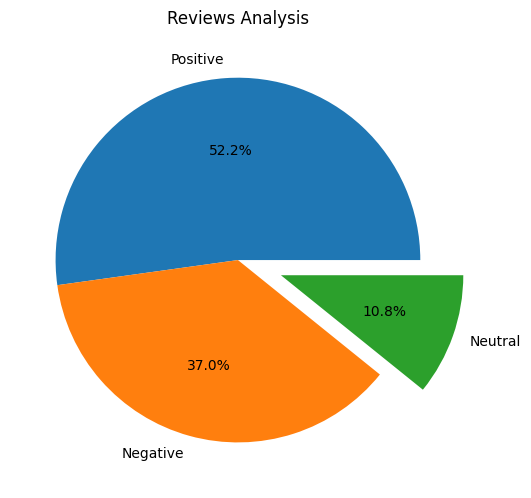

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [69]:
df.to_csv("BA_reviewsNEW.csv")

## WORD CLOUD
A word cloud is a visual representation of text data that shows the most frequently occurring words in a given text corpus. The more frequently a word appears in the text, the larger its size in the word cloud.

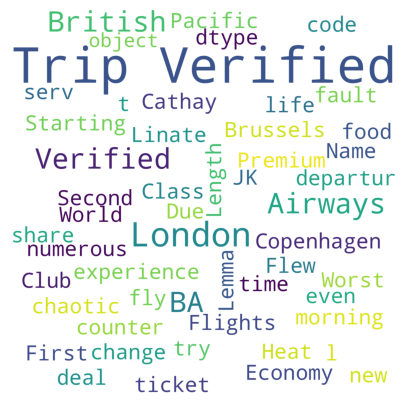

In [83]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        height=700,width=700,
        max_words=500,
        max_font_size=100,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(5, 7))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)